## Multinomial Classification
### Data Preprocessing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from feature_engine.outliers import OutlierTrimmer
from feature_engine.selection import DropCorrelatedFeatures

from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import EditedNearestNeighbours
from imblearn.pipeline import Pipeline as IMBPipeline

In [2]:
import warnings
warnings.filterwarnings('ignore')

## Data Loading

In [3]:
# Data Import
df = pd.read_csv('../../../data/dry_bean.csv')
df.sample(10)

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4,Class
2443,64913,1040.559,343.670356,241.096309,1.425448,0.712636,66203,287.488780,0.715326,0.980514,0.753370,0.836525,0.005294,0.001599,0.699774,0.997491,BARBUNYA
11110,29208,639.590,243.652846,153.443197,1.587903,0.776788,29560,192.843928,0.805494,0.988092,0.897239,0.791470,0.008342,0.002019,0.626425,0.994702,DERMASON
5396,90548,1166.062,461.989423,253.538373,1.822168,0.835956,92762,339.542772,0.726955,0.976132,0.836846,0.734958,0.005102,0.000918,0.540163,0.984268,CALI
11488,30605,643.371,233.194753,167.579504,1.391547,0.695398,30904,197.401865,0.756538,0.990325,0.929136,0.846511,0.007619,0.002413,0.716580,0.997155,DERMASON
2613,68272,1000.450,350.839685,248.483048,1.411926,0.705959,69358,294.833191,0.779067,0.984342,0.857160,0.840364,0.005139,0.001581,0.706212,0.997120,BARBUNYA
8894,45226,814.984,314.125519,183.971330,1.707470,0.810555,45806,239.965688,0.744216,0.987338,0.855657,0.763917,0.006946,0.001459,0.583569,0.996426,SIRA
4500,72318,1038.352,399.276693,232.700045,1.715843,0.812613,73244,303.443796,0.752247,0.987357,0.842883,0.759984,0.005521,0.001136,0.577575,0.991028,CALI
6768,56612,943.324,378.187254,191.480402,1.975070,0.862351,57398,268.478374,0.636083,0.986306,0.799460,0.709909,0.006680,0.001047,0.503970,0.995377,HOROZ
3735,186431,1677.124,642.863374,375.082117,1.713927,0.812145,189926,487.207678,0.814003,0.981598,0.832909,0.757871,0.003448,0.000702,0.574369,0.984426,BOMBAY
1107,39728,727.917,249.827595,202.921800,1.231152,0.583313,40129,224.907227,0.767557,0.990007,0.942199,0.900250,0.006288,0.002548,0.810450,0.997787,SEKER


In [4]:
df.shape

(13611, 17)

## Exploratory Data Analysis

In [6]:
# Know the datatypes
df.dtypes

Area                 int64
Perimeter          float64
MajorAxisLength    float64
MinorAxisLength    float64
AspectRation       float64
Eccentricity       float64
ConvexArea           int64
EquivDiameter      float64
Extent             float64
Solidity           float64
roundness          float64
Compactness        float64
ShapeFactor1       float64
ShapeFactor2       float64
ShapeFactor3       float64
ShapeFactor4       float64
Class               object
dtype: object

We observed, all features are continuous datatype

In [7]:
# Checked the Descriptive Statistics
df.describe()

,Area,Perimeter,MajorAxisLength,MinorAxisLength,AspectRation,Eccentricity,ConvexArea,EquivDiameter,Extent,Solidity,roundness,Compactness,ShapeFactor1,ShapeFactor2,ShapeFactor3,ShapeFactor4
count,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000,13611.000000
mean,53048.284549,855.283459,320.141867,202.270714,1.583242,0.750895,53768.200206,253.064220,0.749733,0.987143,0.873282,0.799864,0.006564,0.001716,0.643590,0.995063
std,29324.095717,214.289696,85.694186,44.970091,0.246678,0.092002,29774.915817,59.177120,0.049086,0.004660,0.059520,0.061713,0.001128,0.000596,0.098996,0.004366
min,20420.000000,524.736000,183.601165,122.512653,1.024868,0.218951,20684.000000,161.243764,0.555315,0.919246,0.489618,0.640577,0.002778,0.000564,0.410339,0.947687
25%,36328.000000,703.523500,253.303633,175.848170,1.432307,0.715928,36714.500000,215.068003,0.718634,0.985670,0.832096,0.762469,0.005900,0.001154,0.581359,0.993703
50%,44652.000000,794.941000,296.883367,192.431733,1.551124,0.764441,45178.000000,238.438026,0.759859,0.988283,0.883157,0.801277,0.006645,0.001694,0.642044,0.996386
75%,61332.000000,977.213000,376.495012,217.031741,1.707109,0.810466,62294.000000,279.446467,0.786851,0.990013,0.916869,0.834270,0.007271,0.002170,0.696006,0.997883
max,254616.000000,1985.370000,738.860154,460.198497,2.430306,0.911423,263261.000000,569.374358,0.866195,0.994677,0.990685,0.987303,0.010451,0.003665,0.974767,0.999733


In [8]:
df.rename({'Class': 'target'}, axis=1, inplace=True)

In [9]:
# sns.pairplot(df, hue='target', corner=True, palette='coolwarm')
# plt.show()

## Data Preprocessing

In [10]:
# Check categorical values for the target variable
sorted(df.target.unique())

['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER', 'SIRA']

In [11]:
# convert the target variable into a categorical ordered form
target_type = pd.CategoricalDtype(categories=sorted(df.target.unique()), ordered=True)
df["target"] = df["target"].astype(target_type)
df['target'].dtype

CategoricalDtype(categories=['BARBUNYA', 'BOMBAY', 'CALI', 'DERMASON', 'HOROZ', 'SEKER',
                  'SIRA'],
, ordered=True)

In [12]:
# Duplicates dropping
nrows = df.shape[0]
df.drop_duplicates(inplace=True)
print(f'Now of rows dropped: {nrows - df.shape[0]}')

Now of rows dropped: 68


In [13]:
# Check Null Data
df.isnull().sum()

Area               0
Perimeter          0
MajorAxisLength    0
MinorAxisLength    0
AspectRation       0
Eccentricity       0
ConvexArea         0
EquivDiameter      0
Extent             0
Solidity           0
roundness          0
Compactness        0
ShapeFactor1       0
ShapeFactor2       0
ShapeFactor3       0
ShapeFactor4       0
target             0
dtype: int64

## Outliers Removal

<function matplotlib.pyplot.show(close=None, block=None)>

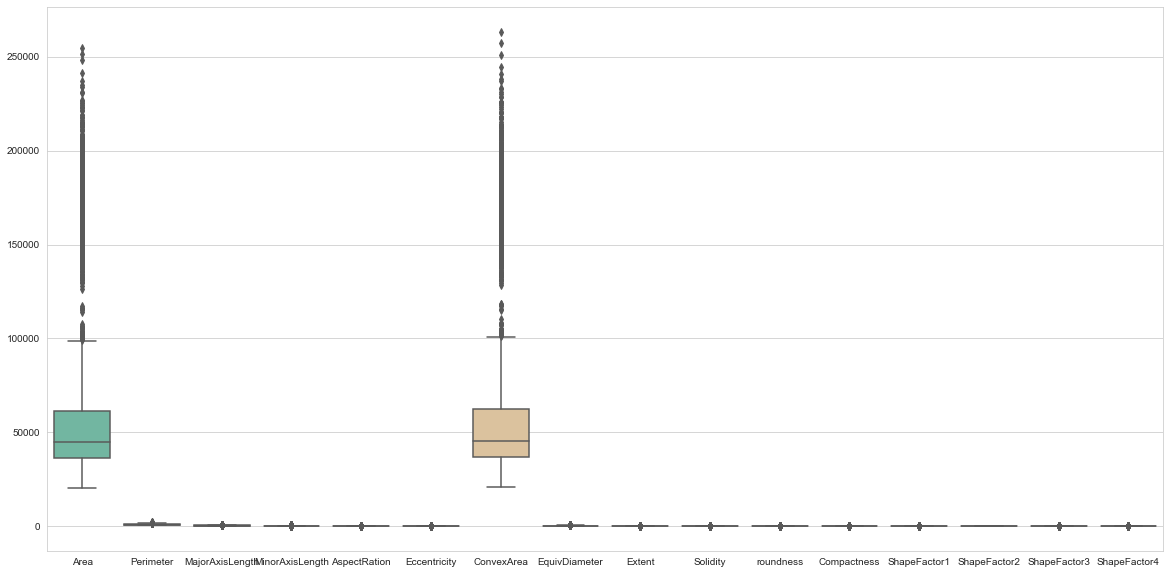

In [14]:
# Check Outliers
plt.figure(figsize=(20, 10))
sns.boxplot(data=df, orient="v", palette="Set2")
plt.show

We observed existence of outliers for features: "Area", "ConvexArea"

In [15]:
df.columns

Index(['Area', 'Perimeter', 'MajorAxisLength', 'MinorAxisLength',
       'AspectRation', 'Eccentricity', 'ConvexArea', 'EquivDiameter', 'Extent',
       'Solidity', 'roundness', 'Compactness', 'ShapeFactor1', 'ShapeFactor2',
       'ShapeFactor3', 'ShapeFactor4', 'target'],
      dtype='object')

In [16]:
# Remove outliers
ot = OutlierTrimmer(capping_method='gaussian', tail='both', fold=3, variables=['Area', 'ConvexArea'])
ot.fit(df)

OutlierTrimmer(tail='both', variables=['Area', 'ConvexArea'])

In [17]:
print("Minimum caps :", ot.left_tail_caps_)
print("Maximum caps :", ot.right_tail_caps_)

Minimum caps : {'Area': -35125.59906962882, 'ConvexArea': -35761.45330632534}
Maximum caps : {'Area': 141222.51984050678, 'ConvexArea': 143297.42672432726}


In [18]:
df_out = ot.transform(df)

In [19]:
print("train data shape after removing outliers:", df_out.shape)
print(f"{df.shape[0] - df_out.shape[0]} observations are removed\n")

train data shape after removing outliers: (13060, 17)
483 observations are removed



<function matplotlib.pyplot.show(close=None, block=None)>

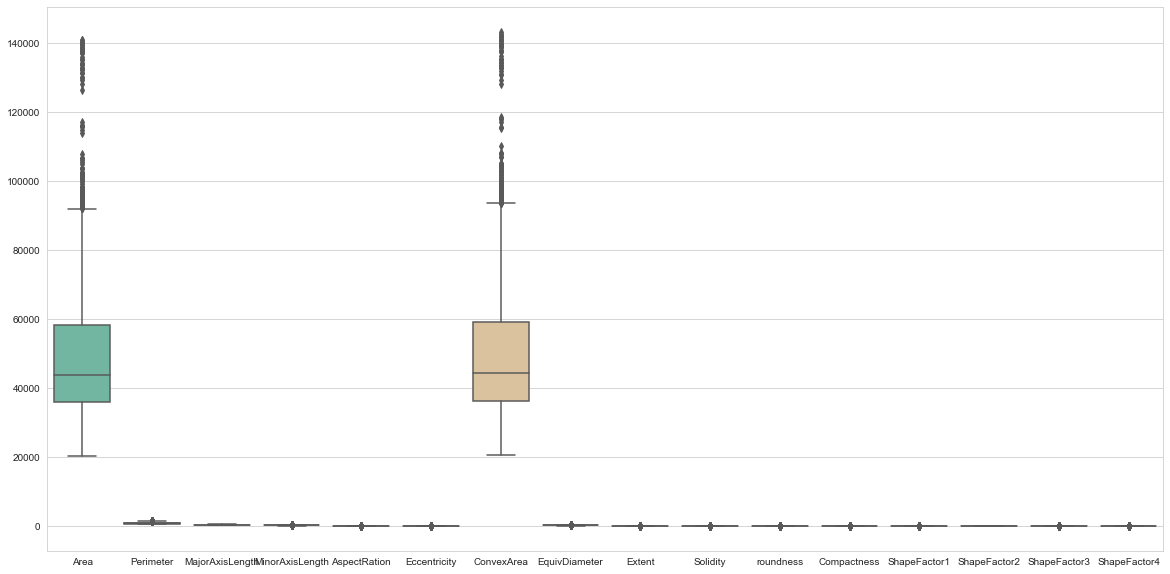

In [20]:
# Check Outliers
plt.figure(figsize=(20, 10))
sns.boxplot(data=df_out, orient="v", palette="Set2")
plt.show

## Feature Engineering

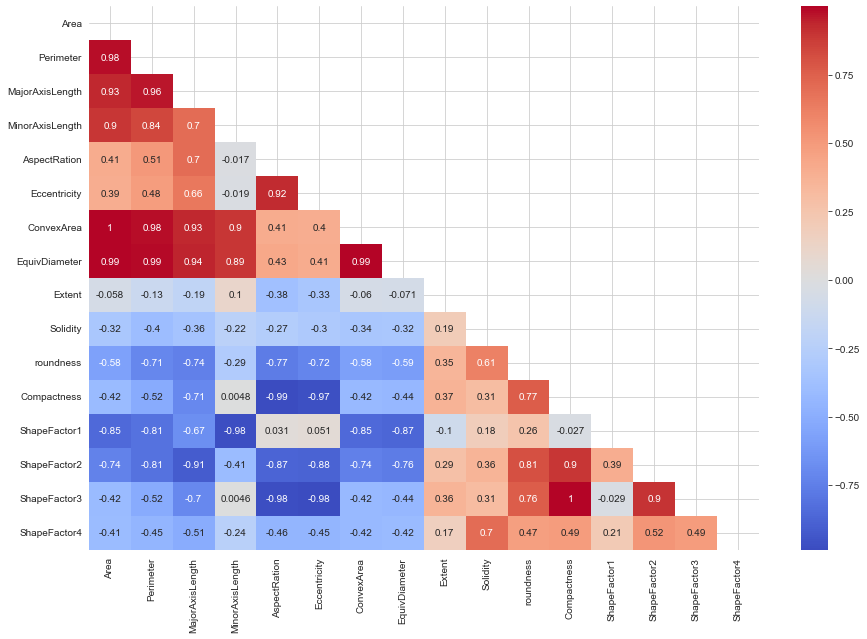

In [21]:
# Show features correlations
plt.figure(figsize=(15, 10))
sns.heatmap(data=df_out.corr(), cmap='coolwarm', mask=np.triu(df_out.corr()), annot=True)
plt.show()

We observed many features are highly correlated

In [22]:
# Drop Correlated features
cols_before = df_out.columns
tr_dcor = DropCorrelatedFeatures(variables=None, method='pearson', threshold=0.8)
df_dcor = tr_dcor.fit_transform(df_out)
cols_after = df_dcor.columns
train_not_test = cols_before.difference(cols_after)
print(f'Dropped features: {list(train_not_test)}')

Dropped features: ['Compactness', 'ConvexArea', 'Eccentricity', 'EquivDiameter', 'MajorAxisLength', 'MinorAxisLength', 'Perimeter', 'ShapeFactor1', 'ShapeFactor2', 'ShapeFactor3']


In [23]:
df_dcor

,Area,AspectRation,Extent,Solidity,roundness,ShapeFactor4,target
0,28395,1.197191,0.763923,0.988856,0.958027,0.998724,SEKER
1,28734,1.097356,0.783968,0.984986,0.887034,0.998430,SEKER
2,29380,1.209713,0.778113,0.989559,0.947849,0.999066,SEKER
3,30008,1.153638,0.782681,0.976696,0.903936,0.994199,SEKER
4,30140,1.060798,0.773098,0.990893,0.984877,0.999166,SEKER
...,...,...,...,...,...,...,...
13606,42097,1.552728,0.714574,0.990331,0.916603,0.998385,DERMASON
13607,42101,1.476439,0.799943,0.990752,0.922015,0.998219,DERMASON
13608,42139,1.472582,0.729932,0.989899,0.918424,0.996767,DERMASON
13609,42147,1.489326,0.705389,0.987813,0.907906,0.995222,DERMASON


## Balancing the dataset

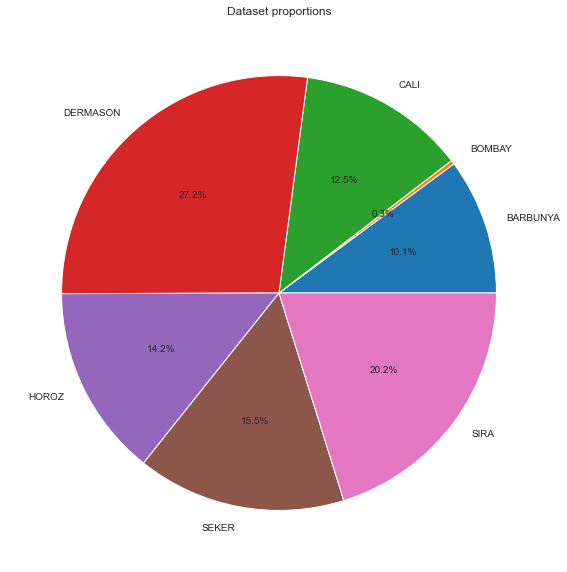

In [24]:
# Check if dataset is imbalanced
labels, counts = np.unique(df_dcor.target, return_counts=True)

plt.figure(figsize=(10, 10))
plt.pie(counts, autopct='%1.1f%%', labels=labels)
plt.title('Dataset proportions')
plt.show()

We observe that data is imbalanced, we need to balance the data

In [25]:
x = df.drop('target', axis=1)
y = df.target

In [26]:
# Sampling Pipeline
imb_pipeline = IMBPipeline([('over-sampling', SMOTE(k_neighbors=2)), ('under-sampling', EditedNearestNeighbours())])
# Transform the dataset
x_sm, y_sm = imb_pipeline.fit_resample(x,y)

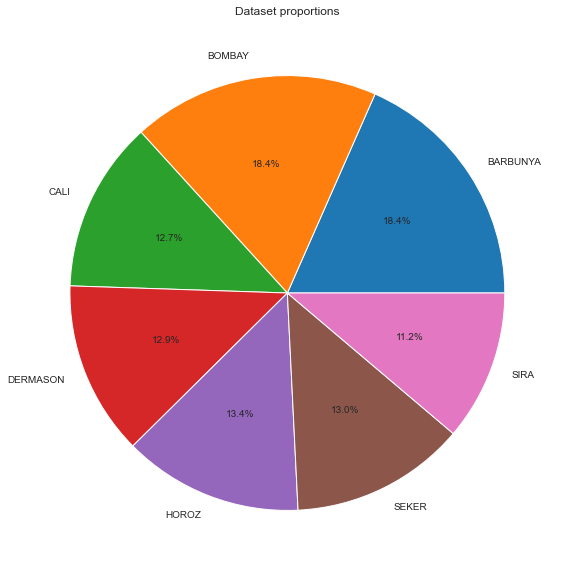

In [27]:
labels, counts = np.unique(y_sm, return_counts=True)

plt.figure(figsize=(10, 10))
plt.pie(counts, autopct='%1.1f%%', labels=labels)
plt.title('Dataset proportions')
plt.show()

## Save cleaned data

In [28]:
df_clean = pd.concat([x_sm, y_sm], axis=1)
df_clean.to_csv('../../../data/dry_bean_clean.csv', index=False)